In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [2]:
# Download the data set of cats and dogs using wget 
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-12-14 05:26:56--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.164.144, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   178MB/s    in 0.4s    

2020-12-14 05:26:56 (178 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# Unzip the downloaded zip file
import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Building a train generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255.0) # rescale images 

training_images_path = '/tmp/cats_and_dogs_filtered/train'

train_generator = train_datagen.flow_from_directory(
    training_images_path, 
    target_size=(64, 64), # resize images to 150 x 150
    batch_size = 30, 
    class_mode='binary' # This is a binary classifier cats and dogs
)

Found 2000 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1/255.0) # rescale images 

validation_images_path = '/tmp/cats_and_dogs_filtered/validation'

validation_generator = validation_datagen.flow_from_directory(
    validation_images_path, 
    target_size=(64, 64), # resize images to 150 x 150
    batch_size = 30, 
    class_mode='binary' # This is a binary classifier cats and dogs
)

Found 1000 images belonging to 2 classes.


In [ ]:
# Build a deep learning CNN having 3 Convulational layers and 1 dense layer

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, (3,3), activation='relu', input_shape=(64, 64, 3)),
    #tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(30, (5,5), activation='relu',strides=(3,3)),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(50, (5,5), activation='relu', strides=(3,3)),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 10)        280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 30)        7530      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 50)          37550     
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1801      
Total params: 47,161
Trainable params: 47,161
Non-trainable params: 0
_________________________________________________________________


Note the shape each layer matches exactly the shapes we calculated for each layer


**Number of parameters in first conv2d layer is calculated as follows:**

There are 10 filters
 
 Each Filter  3 * 3 * 3 = 27 paramters 

 Each Filter has 1 bias

 Each filter therefore has 27 + 1 = 28 parameters

 In total, there are 28 * 10 = 280 parameters


**Number of parameters in second conv2d (conv2d_1) layer  is calculated as follows:**

There are 30 filters
 
 Each Filter  5 * 5 * 10 = 250 parameters 

 10 above corresponds to number of filters in previous layer

 Each Filter has 1 bias

 Each filter therefore has 250 + 1 = 251 parameters

 In total, there are 251 * 30 = 7530 parameters


**Number of parameters in third conv2d (conv2d_2) layer  is calculated as follows:**


There are 50 filters

Each filter has 5 * 5 * 30 = 750 parameters

30 above corresponds to the number of filters in previous layer

Each filter has 1 bias

Each filter therefore has 750 + 1 = 751 paramaters

In total, there are 751 * 50 = 37550 parameters








In [ ]:
# compile the model

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
# Fitting the model and saving the output of each epoch in an object named " history"

history = model.fit(
      train_generator,
      steps_per_epoch=67,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=34,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
67/67 - 8s - loss: 0.6944 - accuracy: 0.5175 - val_loss: 0.6894 - val_accuracy: 0.5450
Epoch 2/100
67/67 - 8s - loss: 0.6856 - accuracy: 0.5510 - val_loss: 0.6810 - val_accuracy: 0.5580
Epoch 3/100
67/67 - 8s - loss: 0.6629 - accuracy: 0.6080 - val_loss: 0.6697 - val_accuracy: 0.5920
Epoch 4/100
67/67 - 8s - loss: 0.6365 - accuracy: 0.6390 - val_loss: 0.6727 - val_accuracy: 0.5900
Epoch 5/100
67/67 - 8s - loss: 0.6185 - accuracy: 0.6655 - val_loss: 0.6570 - val_accuracy: 0.6230
Epoch 6/100
67/67 - 8s - loss: 0.5903 - accuracy: 0.7070 - val_loss: 0.6425 - val_accuracy: 0.6390
Epoch 7/100
67/67 - 8s - loss: 0.5495 - accuracy: 0.7250 - val_loss: 0.6347 - val_accuracy: 0.6480
Epoch 8/100
67/67 - 8s - loss: 0.5178 - accuracy: 0.7465 - val_loss: 0.6256 - val_accuracy: 0.6600
Epoch 9/100
67/67 - 8s - loss: 0.4652 - accuracy: 0.7920 - val_loss: 0.6363 - val_accuracy: 0.6670
Epoch 10/100
67/67 - 8s - loss: 0.4188 - accuracy: 0.8105 - val_loss: 0.6696 - val_accuracy: 0.6800
Epoch 11/

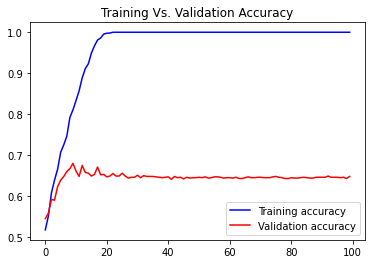

In [ ]:
# Plot the loss and accuracy using the history object

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(0,100)

# Plot training vs validation accuracy

plt.plot(epochs,acc,'b',label = 'Training accuracy')
plt.plot(epochs,val_acc,'r',label = 'Validation accuracy')
plt.title("Training Vs. Validation Accuracy")
plt.legend()
plt.show()




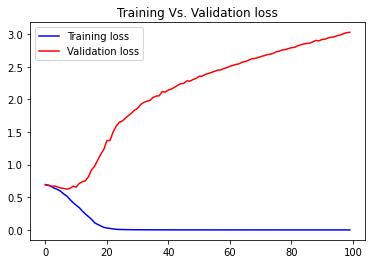

In [ ]:
# Plot Training vs. Validation loss


plt.plot(epochs,loss,'b',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title("Training Vs. Validation loss")
plt.legend()
plt.show()


This is a classical case of overfitting.
After around 15-19 epochs the validation accuracy and validation loss does not improve.
keras allows you to use tranform the training images by zooming, rotating , shearing to create diversity in your training images. This is called image augmentation. This is all done in-memory so the model will take longer to train. 
This strategy of image augmentation helps alleaviate overfitting to some extent.


# Image Augmentation Section


In [ ]:
# Image Augmentation using options in the ImageDataGenetor Object

train_datagen_augmented = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,        # rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures
      width_shift_range=0.3,    # width_shift is a range (fraction of total width) within  which the picture is  horizontally translated
      height_shift_range=0.3,   # height_shift is a range (fraction of total heigth) within  which the picture is  vertically translated
      shear_range=0.3,          # shear_range is for randomly applying shearing transformations.
      zoom_range=0.3,           # zoom_range is for randomly zooming inside pictures
      horizontal_flip=True,     # Horizontal_flip is for randomly flipping half of the images horizontally.
      fill_mode='nearest' )     # strategy used for filling in newly created pixels

In [ ]:
# Build a training generator using ImageDataGenetor Object with Augmentation options

train_generator_augmented = train_datagen_augmented.flow_from_directory(
    training_images_path, 
    target_size=(150, 150), # resize images to 150 x 150
    batch_size = 30, 
    class_mode='binary' # This is a binary classifier cats and dogs
)

Found 2000 images belonging to 2 classes.


In [ ]:
# Fitting the model using the augmented training generator and saving the output of each epoch in an object named "history1"

history1 = model.fit(
      train_generator_augmented,
      steps_per_epoch=67,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=34,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
67/67 - 20s - loss: 0.9210 - accuracy: 0.4995 - val_loss: 0.6941 - val_accuracy: 0.5010
Epoch 2/100
67/67 - 20s - loss: 0.6960 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4990
Epoch 3/100
67/67 - 20s - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
67/67 - 20s - loss: 0.6933 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
67/67 - 20s - loss: 0.6933 - accuracy: 0.4860 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
67/67 - 20s - loss: 0.6933 - accuracy: 0.4815 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
67/67 - 20s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
67/67 - 20s - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 9/100
67/67 - 20s - loss: 0.6933 - accuracy: 0.4810 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 10/100
67/67 - 20s - loss: 0.6933 - accuracy: 0.4890 - val_loss: 0.6931 - val_accuracy: 0.5000

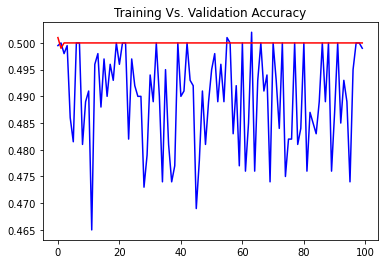

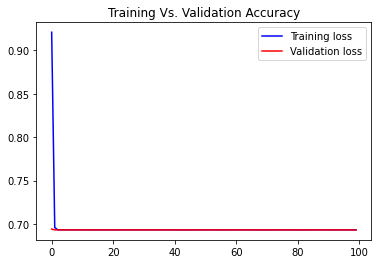

In [ ]:
# Plot the training and validation curves for accuracy and loss

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']


plt.plot(epochs,acc,'b',label = 'Training accuracy')
plt.plot(epochs,val_acc,'r',label = 'Validation accuracy')
plt.title("Training Vs. Validation Accuracy")

plt.figure()

plt.plot(epochs,loss,'b',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title("Training Vs. Validation Accuracy")
plt.legend()
plt.show()




Augmentation seems to have made things worse!
Lets try another set of augmentation parameters


In [ ]:
# Trying a new set of augmentation parameters

train_datagen_augmented = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,        # rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures
      width_shift_range=0.2,    # width_shift is a range (fraction of total width) within  which the picture is  horizontally translated
      height_shift_range=0.2,   # height_shift is a range (fraction of total heigth) within  which the picture is  vertically translated
      shear_range=0.2,          # shear_range is for randomly applying shearing transformations.
      zoom_range=0.2,           # zoom_range is for randomly zooming inside pictures
      horizontal_flip=True,     # Horizontal_flip is for randomly flipping half of the images horizontally.
      fill_mode='nearest' )     # strategy used for filling in newly created pixels

In [ ]:
# Build a training generator using ImageDataGenetor Object with Augmentation options

train_generator_augmented = train_datagen_augmented.flow_from_directory(
    training_images_path, 
    target_size=(150, 150), # resize images to 150 x 150
    batch_size = 30, 
    class_mode='binary' # This is a binary classifier cats and dogs
)

Found 2000 images belonging to 2 classes.


In [ ]:
# Fitting the model using the augmented training generator and saving the output of each epoch in an object named "history2"

history2 = model.fit(
      train_generator_augmented,
      steps_per_epoch=67,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=34,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
67/67 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
67/67 - 21s - loss: 0.6932 - accuracy: 0.4830 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
67/67 - 21s - loss: 0.6932 - accuracy: 0.4770 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100


KeyboardInterrupt: ignored

Interuppted the above training run because validation accuracy was behaving just like before.
Going to try  a different number of steps per epoch


In [ ]:
# Build a training generator using ImageDataGenetor Object with Augmentation options and new batch_size

train_generator_augmented = train_datagen_augmented.flow_from_directory(
    training_images_path, 
    target_size=(150, 150), # resize images to 150 x 150
    batch_size = 20,  # changed batch_size to 20 
    class_mode='binary' # This is a binary classifier cats and dogs
)

# Build a training generator using ImageDataGeneratir object and new batch_size


validation_generator = validation_datagen.flow_from_directory(
    validation_images_path, 
    target_size=(150, 150), # resize images to 150 x 150
    batch_size = 20, # changed batch_size to 20 
    class_mode='binary' # This is a binary classifier cats and dogs
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:

# Fitting the model using the augmented training generator and saving the output of each epoch in an object named "history3"

history3 = model.fit(
      train_generator_augmented,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.4810 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
100/100 - 22s - loss: 0.6932 - accuracy: 0.4820 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
100/100 - 22s - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
100/100 - 22s - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 9/100
100/100 - 22s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 10/100
100/100 - 22s - loss: 0.6932 - accuracy: 0.4900 - val_loss: 0.6931 - 

KeyboardInterrupt: ignored

Interrupped training because validation accuracy is stuck at 50%.
Going to try a different optimizer this time


In [ ]:
# compile the model

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
# Fit model using new optimizer, everything else remains unchanged

history4 = model.fit(
      train_generator_augmented,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 9/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 10/100
100/100 - 21s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - 

KeyboardInterrupt: ignored